#A Notebook to practice ML basics

In this practicum, we practice some basic excercies in machine learning to warm up for more serious work.


In [1]:
#Import packages and define a few custom functions
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
import pylab
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

## Training: Building a Decision Tree Classifier

The cell below loads a standard sklearn toy dataset. It trains a decision tree classifier.
We provide two classification datasets that could be applied to the decision tree algorithms.


Before training your classifier, run the cell below to take a look at the dataset.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())
label_name = "type of iris plant"
print(iris.target_names)
labels = [iris.target_names[x] for x in iris.target]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


Let's define and fit a simple tree classifier

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, labels)

## Visualizing a Decision Tree

The following cell will generate a visualization of the decision tree.

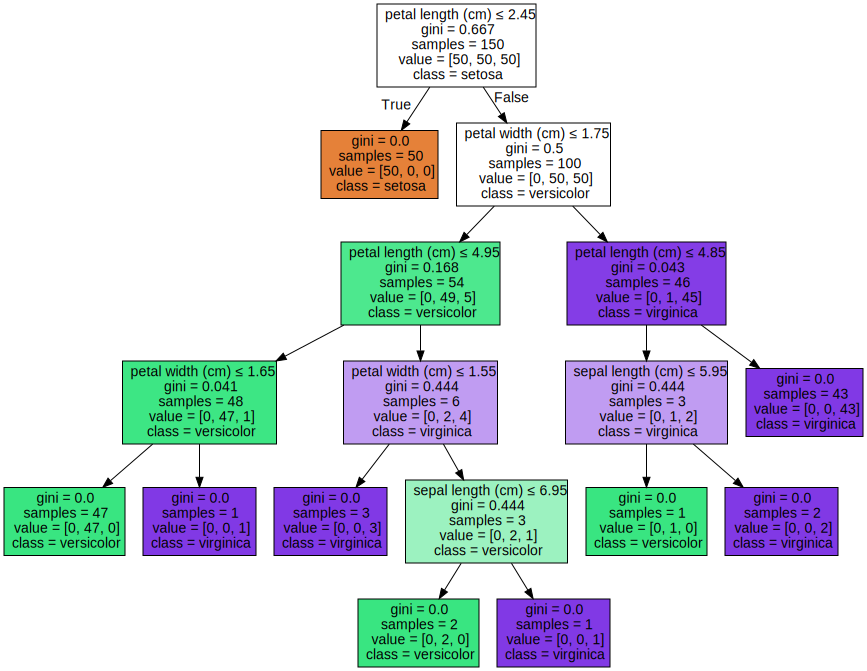

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5, \
feature_names=iris.feature_names,class_names=clf.classes_,label='all', \
filled=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph

## Evaluating the Accuracy of a Decision Tree Classifier¶

The following cell will run cross-validation (k-fold, where k=5) to evaluate your decision tree classifier.

K Fold Cross-Validation is used to estimate prediction error. The dataset is randomly divided into K folds. The first fold acts as the validation set while the method is fit on remaining K-1 folds. Mean Squared Error is calculated on the observations from the held-out fold. The process is repeated K times, taking a different part each time.

In [5]:
n_foldCV = 5
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data,iris.target)
scores = cross_val_score(clf, iris.data, labels, cv=n_foldCV)

The following cell will output the accuracy score for each fold and the accuracy estimate of the model under 95% confidence interval.

In [6]:
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9333333333333333
0.9666666666666667
0.9
0.8666666666666667
1.0
Accuracy: 0.93 (+/- 0.09)


Can you calculate the precision, recall and f-1 scores? Please write the code in the following block

In [7]:
#your code here

Let's visualize the data by two feauters - you can see that this is a pretty easy task

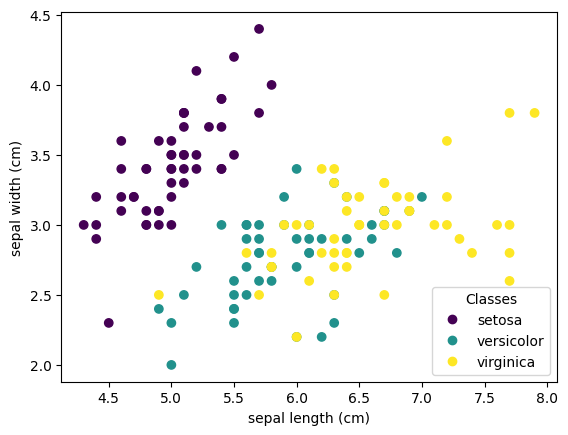

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Now, let's try to do the same task with a kNN classifier

In [9]:
n_foldCV = 5
neigh = KNeighborsClassifier(n_neighbors=1)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9333333333333333
1.0
Accuracy: 0.96 (+/- 0.05)


Let's add some noise and see what happens

In [10]:
iris.data += np.random.normal(0, .5, iris.data.shape)

Let's repeat the same task with the noisy data

In [11]:
n_foldCV = 5
neigh = KNeighborsClassifier(n_neighbors=10)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9
0.8666666666666667
0.8333333333333334
0.9
0.9
Accuracy: 0.88 (+/- 0.05)


Now let's visualize the decision boundaries of kNN; play with the valye of k in kNN and see what happens

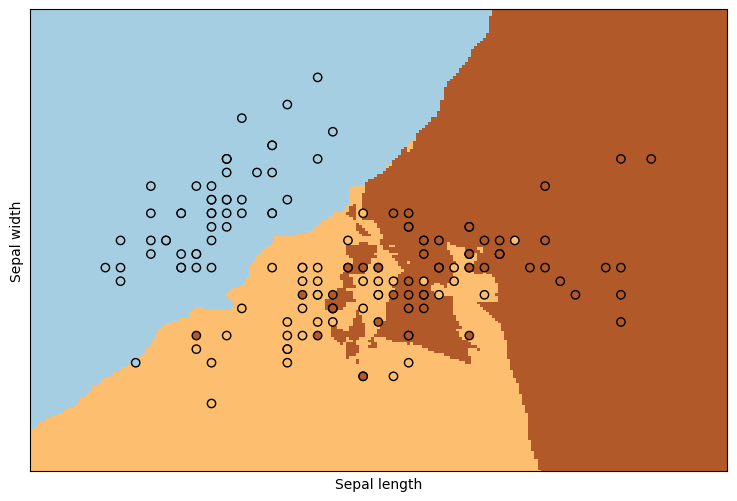

In [12]:
# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

h = .02 # step size in the mesh

knn=KNeighborsClassifier(n_neighbors=5)

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Now let's try a different task. We generate some synthetic sequential data

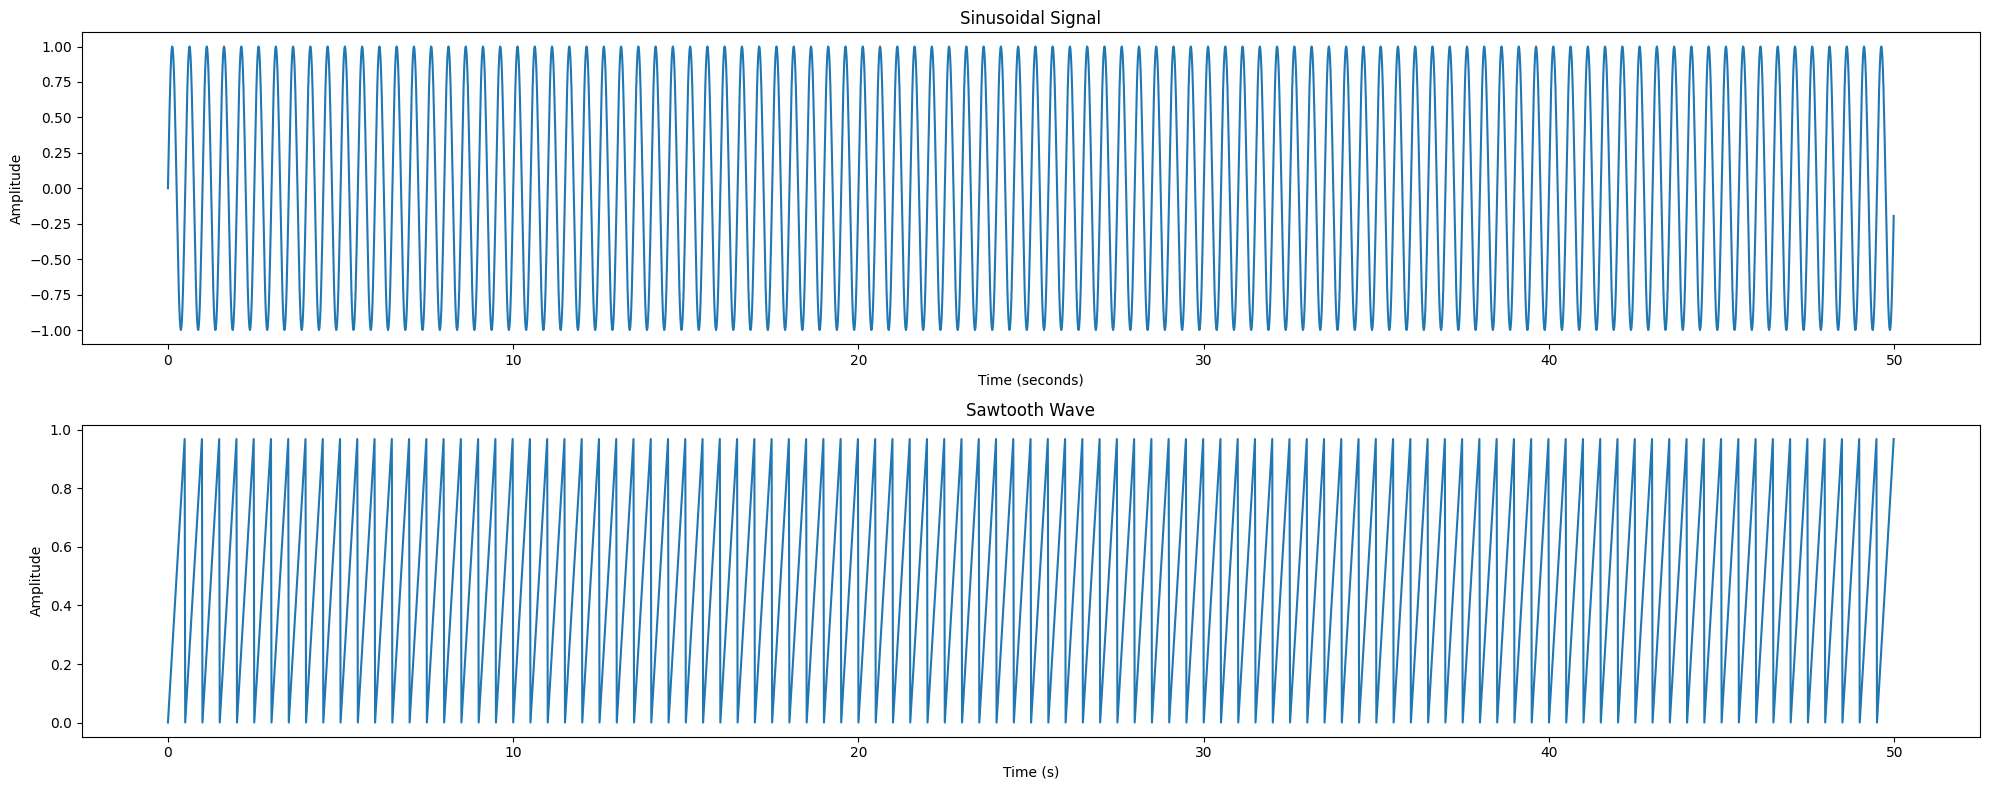

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for the signal
frequency = 2  # Hz (can be adjusted as needed)
amplitude = 1  # (can be adjusted as needed)
duration = 50  # seconds (can be adjusted as needed)
sample_rate = 64  # Hz

# Generate time values for the signal
time = np.arange(0, duration, 1/sample_rate)

# Generate the sinusoidal signal
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
# Plot the signal
axs[0].plot(time, sine_wave)
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sinusoidal Signal")


# Generate sawtooth wave
sawtooth_wave = np.mod(time * frequency, 1)

# Plot the wave
axs[1].plot(time, sawtooth_wave)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Sawtooth Wave")
plt.tight_layout()

plt.show()

now let's generate some synthetic sequential samples from these two signals - we add some noise as well

In [ ]:
sawtooth_wave += np.random.normal(0, .2, sawtooth_wave.shape)
sine_wave += np.random.normal(0, .2, sine_wave.shape)